### 1. Business Understanding

Patient health and demographic data are used to analyze medical patterns and predict health outcomes to support data-driven healthcare decisions.

#### Classification
##### Business Objective
Identify patients at risk of developping heart disease.  
##### Data Science Objective
Build a classification model to predict `heart_disease` (binary outcome: 0 = no, 1 = yes).

---

#### Regression
##### Business Objective
Predict patient health metrics for better planning.  
##### Data Science Objective
Predict continuous variables such as:
- `cholesterol` (based on age, BMI, glucose, etc.)

---

#### Segmentation
##### Business Objective
Identify patient risk groups for targeted interventions.  
##### Data Science Objective
Cluster patients into health profiles, such as:
- Young healthy  
- Middle-aged with obesity risk  
- Older with cardiovascular risk  
- High-risk diabetics  

---

#### Recommendation
##### Business Objective
Provide personalized lifestyle and medical recommendations.  
##### Data Science Objective
Recommend preventive actions or treatments by:
- Suggesting diet/exercise plans based on similar patients   
- Linking patient profiles to treatment pathways


# Data source : 
Our Data is Externe we download it from https://storage.googleapis.com/kagglesdsdata/datasets/3612875/6283119/patient_dataset.csv


### 2. Data Understanding

#### Dataset Dimensions
- **Rows (samples):** 6,000  
- **Columns (features):** 16  

#### Features Overview
##### Demographic
- `age`: Patient age (numeric)
- `gender`: 0 = Female, 1 = Male (binary/categorical)
- `residence_type`: Urban / Rural (categorical)
- `smoking_status`: Smoker / Non-Smoker / Unknown (categorical)

##### Medical History
- `chest_pain_type`: Types of chest pain (categorical: 1–4)
- `blood_pressure`: Resting blood pressure (numeric)
- `cholesterol`: Serum cholesterol level (numeric)
- `max_heart_rate`: Maximum heart rate achieved (numeric)
- `exercise_angina`: 0 = No, 1 = Yes (binary)
- `plasma_glucose`: Blood sugar level (numeric)
- `skin_thickness`: Skinfold thickness (numeric)
- `insulin`: Insulin level (numeric)
- `bmi`: Body Mass Index (numeric)
- `diabetes_pedigree`: Genetic diabetes risk factor (numeric)

##### Outcomes / Targets
- `hypertension`: 0 = No, 1 = Yes  
- `heart_disease`: 0 = No, 1 = Yes  


### 3. Data description

#### Data imports

In [207]:
import numpy as np # Manipuer les tableaux
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import pandas as pd
from ydata_profiling import ProfileReport

### Data Recovery

In [208]:
data = pd.read_csv(r"C:\Users\Gharbi\Documents\datasets\patient_dataset.csv")
data.head()

age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     NaN                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0      NaN  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease residence_type  \
0           0.480277             1              1          Urban   
1           0.283986             1              1          Urban   
2           2.472309             1              0          Rural   
3           1.472052             0              1          Rural   
4           0.537627             1              1          Rural   

  smoking_status  
0         Smoker  
1        Unknown  
2     Non-Smoker  
3         Smoker  
4         Smoker

In [209]:
print(data.shape) # Afficher le nbr de colonne et de ligne

(6000, 16)


####  Descriptive analysis: data visualization distribution

Histogram

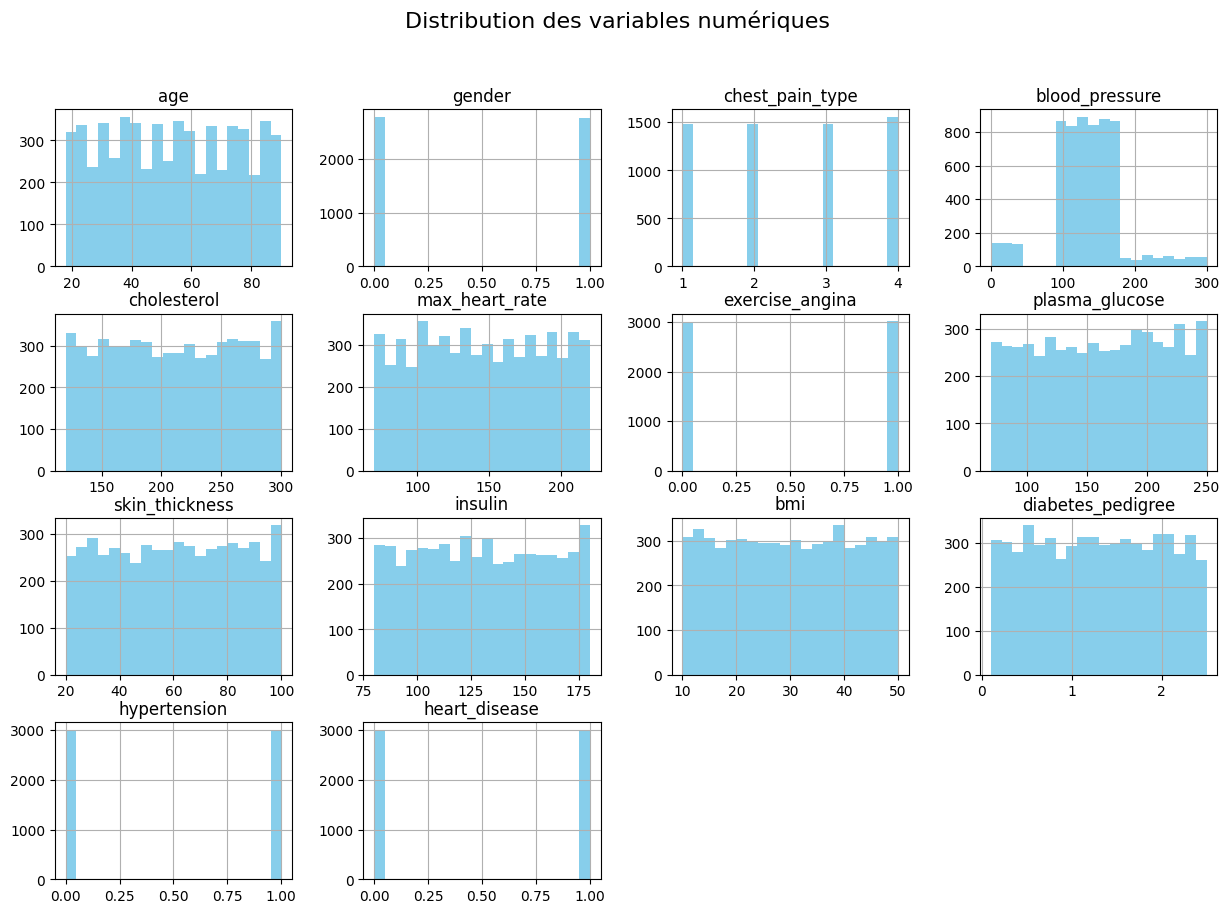

In [210]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()


Boxplots (to detect extreme values)

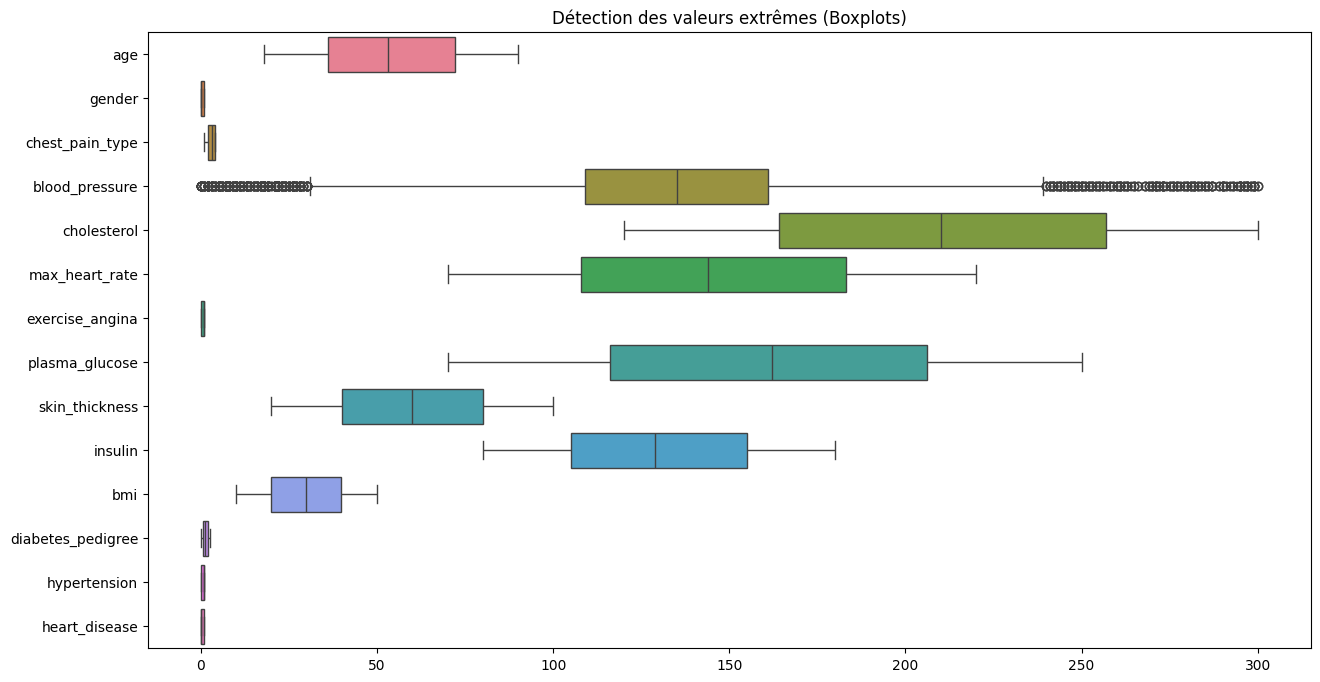

In [211]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[num_cols], orient="h")
plt.title("Détection des valeurs extrêmes (Boxplots)")
plt.show()

Distribution of categorical variables: bar chart

C:\Users\Gharbi\AppData\Local\Temp\ipykernel_1420\1671797158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


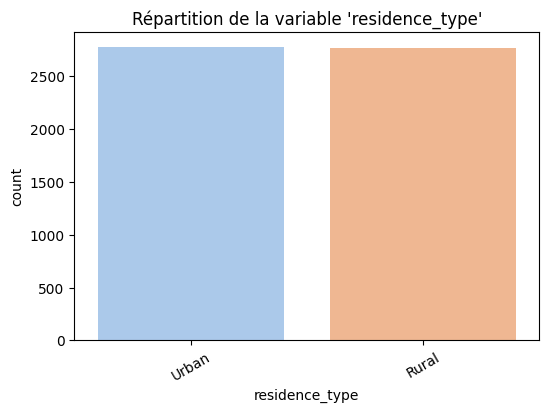

C:\Users\Gharbi\AppData\Local\Temp\ipykernel_1420\1671797158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


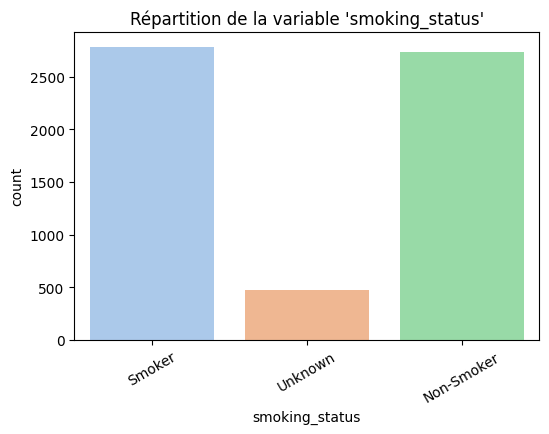

In [212]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f"Répartition de la variable '{col}'")
    plt.xticks(rotation=30)
    plt.show()

Correlation matrix:

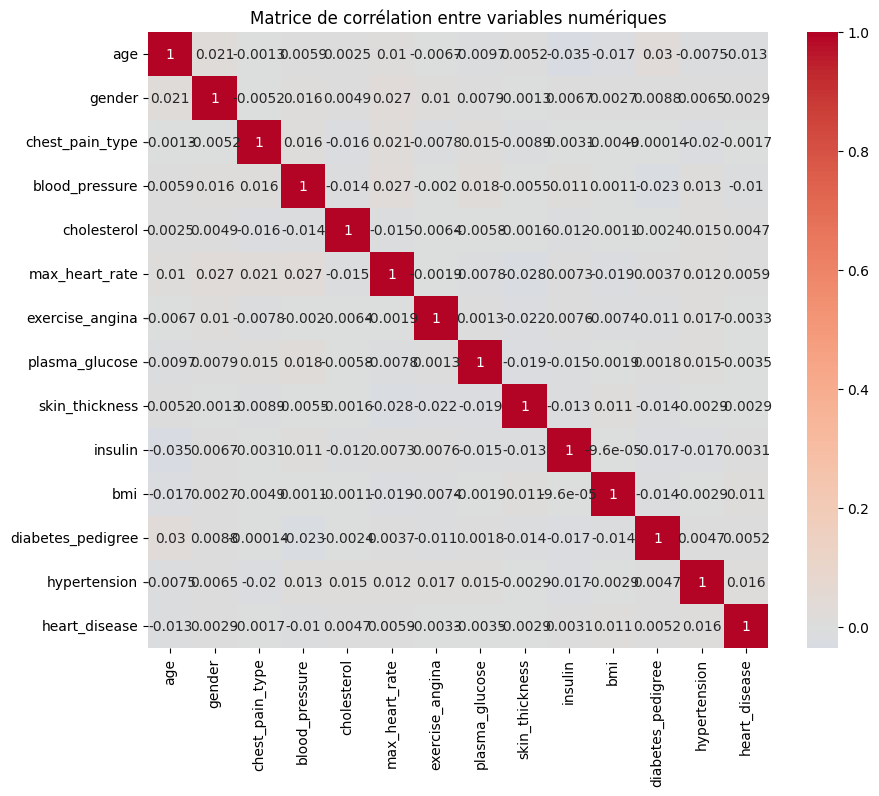

In [213]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

Relationships between variables

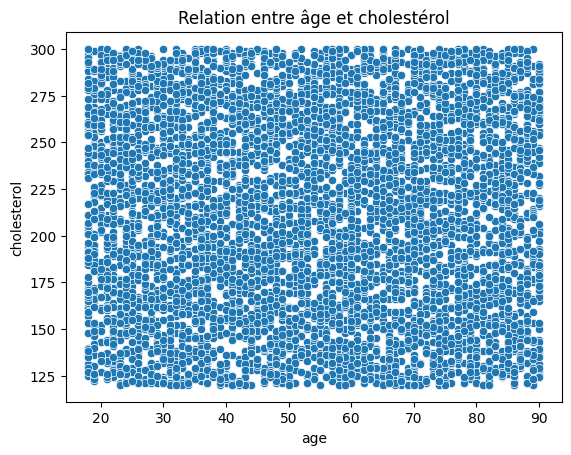

In [214]:
# Relation entre deux variables numériques
sns.scatterplot(x='age', y='cholesterol', data=data)
plt.title("Relation entre âge et cholestérol")
plt.show()

# Si tu as une variable cible (target)
# sns.boxplot(x='target', y='cholesterol', data=data)
# plt.title("Distribution du cholestérol selon la cible")
# plt.show()

Synthetic summary: a small automatic EDA report

In [215]:
profile = ProfileReport(data, title="Rapport EDA - Patient Dataset", explorative=True)
profile.to_notebook_iframe()   # ou profile.to_file("rapport_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 58.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
data.describe()  # Description de la data

age       gender  chest_pain_type  blood_pressure  cholesterol  \
count  6000.000000  5528.000000      6000.000000     6000.000000  6000.000000   
mean     53.657833     0.497648         2.518500      134.277167   209.844667   
std      21.018382     0.500040         1.124071       48.303001    52.840432   
min      18.000000     0.000000         1.000000        0.000000   120.000000   
25%      36.000000     0.000000         2.000000      109.000000   164.000000   
50%      53.000000     0.000000         3.000000      135.000000   210.000000   
75%      72.000000     1.000000         4.000000      161.000000   257.000000   
max      90.000000     1.000000         4.000000      300.000000   300.000000   

       max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  \
count     6000.000000      6000.000000     5391.000000     5386.000000   
mean       144.996000         0.503167      161.119644       59.964723   
std         43.583318         0.500032       52.434693       23.264030   
min         70.000000         0.000000       70.000000       20.000000   
25%        108.000000         0.000000      116.000000       40.000000   
50%        144.000000         1.000000      162.000000       60.000000   
75%        183.000000         1.000000      206.000000       80.000000   
max        220.000000         1.000000      250.000000      100.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  5432.000000  6000.000000        6000.000000   6000.000000   
mean    129.601252    29.941495           1.294623      0.501333   
std      29.207479    11.626425           0.689932      0.500040   
min      80.000000    10.006670           0.100068      0.000000   
25%     105.000000    19.797401           0.690522      0.000000   
50%     129.000000    29.940303           1.294057      1.000000   
75%     155.000000    39.859571           1.899079      1.000000   
max     180.000000    49.999449           2.499635      1.000000   

       heart_disease  
count    6000.000000  
mean        0.498167  
std         0.500038  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [217]:
data.duplicated().sum() # Vérification des doublons

np.int64(0)

In [218]:
data.isnull().sum()  # Valeur manquantes

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

📊 Interpretation of results

Columns with no missing values (0):
age, chest_pain_type, blood_pressure, cholesterol,
max_heart_rate, exercise_angina, bmi,
diabetes_pedigree, hypertension, heart_disease,
smoking_status.

✅ These columns are complete → no cleaning needed.

Columns with missing values:

gender → 472 missing values

residence_type → 455 missing values

plasma_glucose → 609 missing values

skin_thickness → 614 missing values

insulin → 568 missing values

In [ ]:
missing = (data.isnull().mean() * 100).round(1)
missing = missing[missing > 0]

total_cols = data.shape[1]
total_rows = data.shape[0]

print(f"📊 The dataset contains {total_rows} rows and {total_cols} columns.\n")
print("🔎 Columns with missing values:\n")

for col, pct in missing.items():
    count = int((pct / 100) * total_rows)
    impact = ""
    if pct < 5:
        impact = "low impact — few missing values."
    elif pct < 10:
        impact = "moderate impact — watch out during analysis."
    else:
        impact = "high impact — consider imputation or removal."

    print(f"• {col:<20} : {pct:>5}% ({count} missing values) → {impact}")

print("\n💬 Overall interpretation:")
total_missing = (data.isnull().sum().sum() / (total_rows * total_cols) * 100).round(2)
print(f"In total, {total_missing}% of all dataset values are missing.")

📊 The dataset contains 6000 rows and 16 columns.

🔎 Columns with missing values:

• gender               :   7.9% (474 missing values) → moderate impact — watch out during analysis.
• plasma_glucose       :  10.2% (612 missing values) → high impact — consider imputation or removal.
• skin_thickness       :  10.2% (612 missing values) → high impact — consider imputation or removal.
• insulin              :   9.5% (570 missing values) → moderate impact — watch out during analysis.
• residence_type       :   7.6% (456 missing values) → moderate impact — watch out during analysis.

💬 Overall interpretation:
In total, 2.83% of all dataset values are missing.


In [221]:
num_cols = ["blood_pressure", "cholesterol", "max_heart_rate", 
            "plasma_glucose", "skin_thickness", "insulin", 
            "bmi", "diabetes_pedigree", "age"]

num_imputer = SimpleImputer(strategy="median")
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [222]:
cat_cols = ["gender", "residence_type", "smoking_status"]

cat_imputer = SimpleImputer(strategy="most_frequent")
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [223]:
print(data.isnull().sum())
print((data.isnull().mean() * 100).round(2))

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64
age                  0.0
gender               0.0
chest_pain_type      0.0
blood_pressure       0.0
cholesterol          0.0
max_heart_rate       0.0
exercise_angina      0.0
plasma_glucose       0.0
skin_thickness       0.0
insulin              0.0
bmi                  0.0
diabetes_pedigree    0.0
hypertension         0.0
heart_disease        0.0
residence_type       0.0
smoking_status       0.0
dtype: float64


All columns now have 0 missing values. ✅

This means the imputation worked: all previously missing data in numerical and categorical columns have been filled.

Next output (percentage):

age                  0.0
gender               0.0
chest_pain_type      0.0
...


0.0% missing values for all columns ✅

The dataset is now complete, ready for machine learning models without any NaN-related issues.

In [224]:
# Colonnes numériques
num_cols = ["age", "blood_pressure", "cholesterol", "max_heart_rate", 
            "plasma_glucose", "skin_thickness", "insulin", 
            "bmi", "diabetes_pedigree"]

In [225]:
# Imputer les valeurs manquantes numériques avec la médiane

num_imputer = SimpleImputer(strategy="median")
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [226]:
# Colonnes catégorielles
cat_cols = ["gender", "chest_pain_type", "exercise_angina", 
            "residence_type", "smoking_status", "hypertension", "heart_disease"]

In [227]:
# Imputer les valeurs manquantes catégorielles avec la valeur la plus fréquente
cat_imputer = SimpleImputer(strategy="most_frequent")
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [228]:
# Vérifier de nouveau les valeurs manquantes
print(data.isnull().sum())
print((data.isnull().mean() * 100).round(2))

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64
age                  0.0
gender               0.0
chest_pain_type      0.0
blood_pressure       0.0
cholesterol          0.0
max_heart_rate       0.0
exercise_angina      0.0
plasma_glucose       0.0
skin_thickness       0.0
insulin              0.0
bmi                  0.0
diabetes_pedigree    0.0
hypertension         0.0
heart_disease        0.0
residence_type       0.0
smoking_status       0.0
dtype: float64


In [229]:
# Encodage des variables catégorielles

lb_make = LabelEncoder()
for col in cat_cols:
    data[col] = lb_make.fit_transform(data[col])


In [230]:
# Détection et suppression des outliers pour certaines colonnes (exemple: age, bmi)
for col in ['age', 'bmi', 'blood_pressure', 'cholesterol']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    filter_ = (data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)
    data = data.loc[filter_]

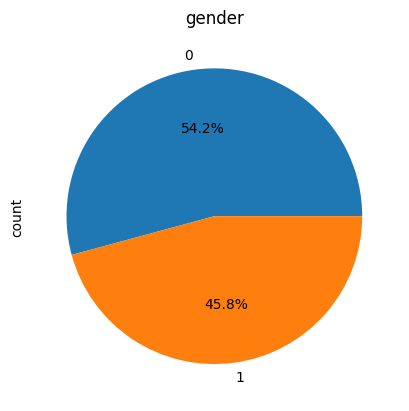

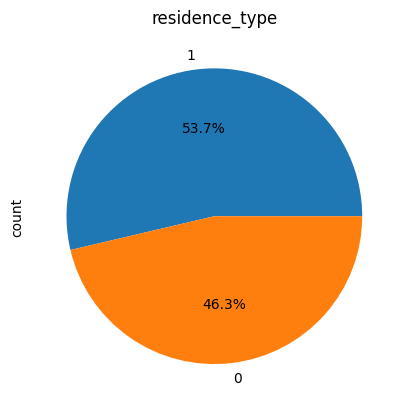

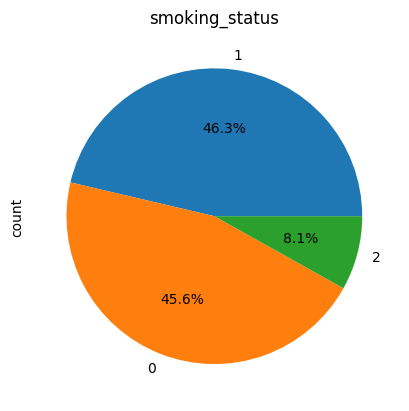

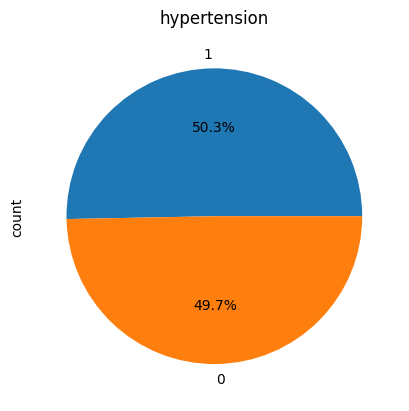

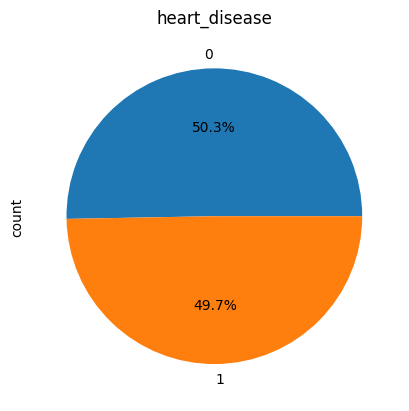

In [231]:
# Visualisations simples
for col in ['gender', 'residence_type', 'smoking_status', 'hypertension', 'heart_disease']:
    data[col].value_counts().plot.pie(autopct='%1.1f%%', title=col)
    plt.show()

Interpretation:

The population in our dataset is slightly predominantly female (54.2%).

Men represent 45.8%, so the distribution is fairly balanced, which is interesting for a predictive model because there is no significant imbalance in this variable.


🔹 Next Steps for PCA Model

1. Feature Scaling

In [232]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_cols])


2. Applying PCA

In [233]:
pca = PCA(n_components=None)  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)


3. Explained Variance Analysis

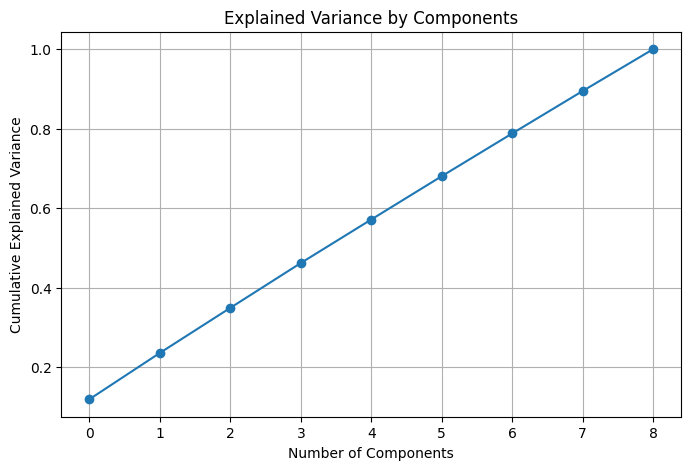

In [234]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


🧭 Interpretation

From the curve:

Each component contributes roughly an equal amount of variance (around 10–15% each).

There’s no clear “elbow” — meaning the data doesn’t have a few dominant components; all variables contribute similarly.

👉 We will choose the number of components that explain ~80–90% of the variance.
Keep 4 or 5 components → they explain about 70–80% of total variance, which is usually sufficient in PCA.

4. Rebuild PCA with Optimal Components

In [235]:
pca_opt = PCA(n_components=5)  # replace k with chosen number
X_pca_opt = pca_opt.fit_transform(X_scaled)


5. Interpret Principal Components

In [236]:
loadings = pd.DataFrame(
    pca_opt.components_.T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=num_cols
)
print(loadings)


                        PC1       PC2       PC3       PC4       PC5
age                0.511596 -0.280551  0.220869 -0.132725  0.164568
blood_pressure     0.293129  0.324140  0.291298  0.400373 -0.320472
cholesterol       -0.149704 -0.495516 -0.327131 -0.242911 -0.495719
max_heart_rate     0.336203  0.393164 -0.094100 -0.314376  0.016972
plasma_glucose    -0.036834 -0.039045 -0.335193  0.782758  0.091021
skin_thickness    -0.063823 -0.159382  0.711544  0.088716 -0.373845
insulin           -0.298358  0.559162  0.012640 -0.208412  0.051592
bmi               -0.405968 -0.213478  0.356606  0.014822  0.602047
diabetes_pedigree  0.507586 -0.175921 -0.067201 -0.003547  0.333200


🧭 Interpretation of PCA Loadings

Each column (PC1–PC5) represents a direction of maximum variance — a combination of your original features.
Each value shows how much a variable contributes (positively or negatively) to that component.

🧩 PC1 (first component)

Main contributors:

age (0.51) and diabetes_pedigree (0.51) → strong positive correlation

bmi (-0.41) → negative influence

Interpretation:
PC1 represents a "metabolic and age-related factor" — older patients with higher diabetes pedigree but lower BMI tend to differ from younger or leaner patients.

🧩 PC2 (second component)

Main contributors:

insulin (0.56) and max_heart_rate (0.39) → positive

cholesterol (-0.50) → negative

Interpretation:
PC2 may capture a "cardio-metabolic contrast" — high insulin and heart rate versus low cholesterol.

🧩 PC3 (third component)

Main contributors:

skin_thickness (0.71) → strongly positive

cholesterol (-0.33), plasma_glucose (-0.34) → negative

Interpretation:
PC3 seems to represent a "body composition vs. lipid–glucose" axis.

🧩 PC4 (fourth component)

Main contributors:

plasma_glucose (0.78) → very strong positive

blood_pressure (0.40) → moderate positive

Interpretation:
PC4 likely represents a "glucose–blood pressure factor", related to diabetes or cardiovascular risk.

🧩 PC5 (fifth component)

Main contributors:

bmi (0.60) → strong positive

cholesterol (-0.50) → strong negative

Interpretation:
PC5 contrasts body mass with cholesterol levels, another metabolic dimension.

🎯 Summary Table
Component	Dominant Features	Possible Interpretation
PC1	age, diabetes_pedigree, bmi	Age & diabetes profile
PC2	insulin, cholesterol, heart rate	Cardio-metabolic contrast
PC3	skin_thickness, cholesterol, glucose	Body composition factor
PC4	plasma_glucose, blood_pressure	Glucose–pressure axis
PC5	bmi, cholesterol	Weight–lipid relation

VISUALISATION ACP / PCA

🎨 1- Visualize PCA Loadings as a Heatmap

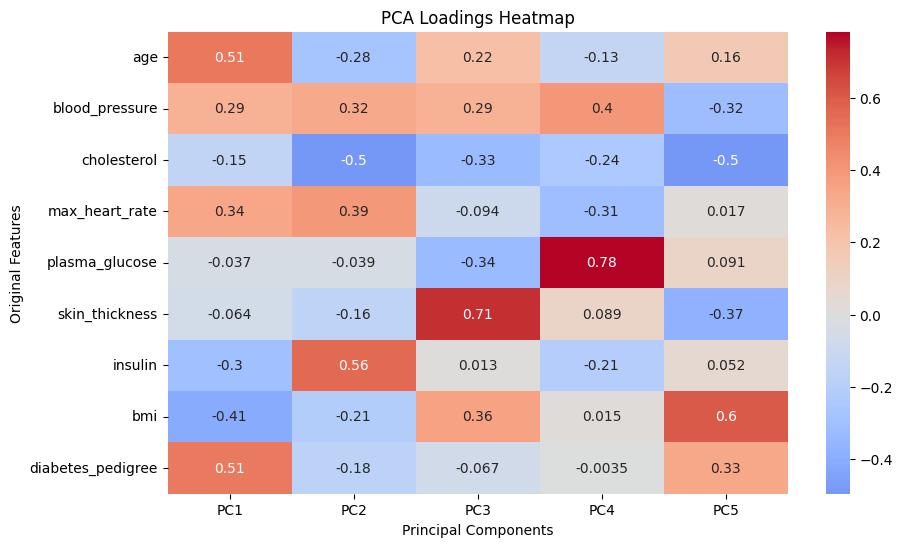

In [237]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


👇

🧭 Interpretation of PCA Loadings Heatmap
🔹 1. Understanding the Heatmap

Each cell shows the loading (or correlation) between an original feature and a principal component (PC).

Red (positive) means a strong positive contribution to that component.

Blue (negative) means a strong negative contribution.

Values close to 0 → the feature has little influence on that component.

🔹 2. Main Observations
🧩 PC1

Strong positive loadings: age (0.51), diabetes_pedigree (0.51)

Strong negative loadings: bmi (-0.41), insulin (-0.30)

👉 Interpretation:
PC1 captures a contrast between older age / higher diabetes pedigree and lower BMI / insulin.
It may represent a “metabolic–age” dimension, distinguishing older individuals with diabetes risk from younger, more obese ones.

🧩 PC2

High positive loadings: insulin (0.56), max_heart_rate (0.39), blood_pressure (0.32)

Strong negative: cholesterol (-0.50)

👉 Interpretation:
PC2 opposes insulin & cardiovascular activity against cholesterol levels.
It may reflect a “cardiovascular-metabolic balance” component.

🧩 PC3

High positive: skin_thickness (0.71), bmi (0.36)

Moderate negative: cholesterol (-0.33), plasma_glucose (-0.34)

👉 Interpretation:
PC3 relates to body composition (fatness indicators) versus lipid/glucose metabolism — a “body composition vs metabolic efficiency” axis.

🧩 PC4

Strong positive: plasma_glucose (0.78)

👉 Interpretation:
PC4 is dominated by plasma glucose, representing blood sugar regulation — possibly linked to diabetes risk.

🧩 PC5

Positive: bmi (0.60), diabetes_pedigree (0.33)

Negative: cholesterol (-0.50), skin_thickness (-0.37)

👉 Interpretation:
PC5 shows a mix of BMI and family diabetes risk opposed to cholesterol/skin thickness — a “genetic and weight factor” component.

🔹 3. Summary Table of Component Meaning
PC	Dominant Features	Likely Meaning
PC1	age, diabetes_pedigree (+); bmi, insulin (–)	Metabolic–Age axis
PC2	insulin, max_heart_rate (+); cholesterol (–)	Cardiovascular–Metabolic balance
PC3	skin_thickness, bmi (+)	Body composition
PC4	plasma_glucose (+)	Blood sugar regulation
PC5	bmi, diabetes_pedigree (+); cholesterol (–)	Genetic/weight-related profile

🧭 2. Visualize PCA Projection (2D Scatter Plot)

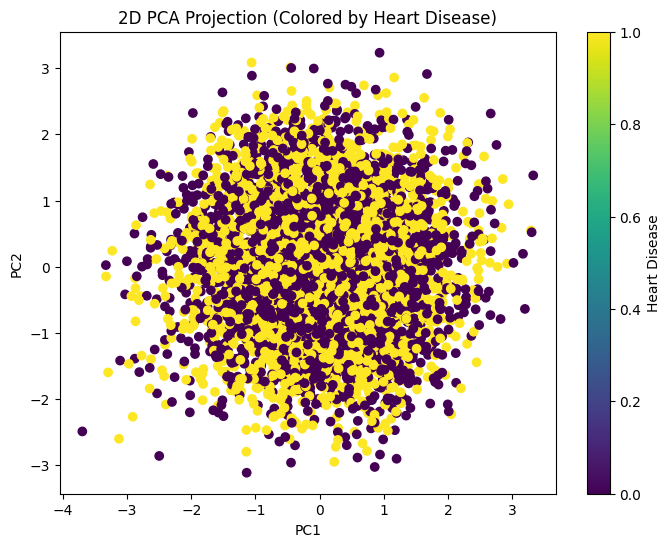

In [238]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=data['heart_disease'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection (Colored by Heart Disease)')
plt.colorbar(label='Heart Disease')
plt.show()


🧭 Interpretation of Your PCA 2D Projection
1. General Observation

The plot shows a dense cloud of points — there is no clear separation between patients with (1, yellow) and without (0, purple) heart disease along PC1 and PC2.

This means that the first two principal components (which capture the most variance in the data) do not strongly distinguish between healthy and sick patients.

✅ 1️⃣ Build a Classification Model

In [239]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_opt, data['heart_disease'], test_size=0.2, random_state=42)

# Logistic Regression model
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train, y_train)

# Predictions
y_pred = model_pca.predict(X_test)
y_proba = model_pca.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Accuracy: 0.48138056312443234
AUC: 0.4925787210431405
              precision    recall  f1-score   support

           0       0.48      0.70      0.57       534
           1       0.49      0.27      0.35       567

    accuracy                           0.48      1101
   macro avg       0.49      0.49      0.46      1101
weighted avg       0.49      0.48      0.46      1101



✅ 2️⃣ Compare with Non-PCA Model

Goal: Check whether PCA improved the performance.

In [240]:
# Use original features (not PCA)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, data['heart_disease'], test_size=0.2, random_state=42)

model_raw = RandomForestClassifier(random_state=42)
model_raw.fit(X_train2, y_train2)
y_pred2 = model_raw.predict(X_test2)

print("Accuracy without PCA:", accuracy_score(y_test2, y_pred2))


Accuracy without PCA: 0.522252497729337


✅ 3️⃣ Visualize Feature (or PC) Importance

Goal: Understand which Principal Components (or features) matter most.

For Logistic Regression:

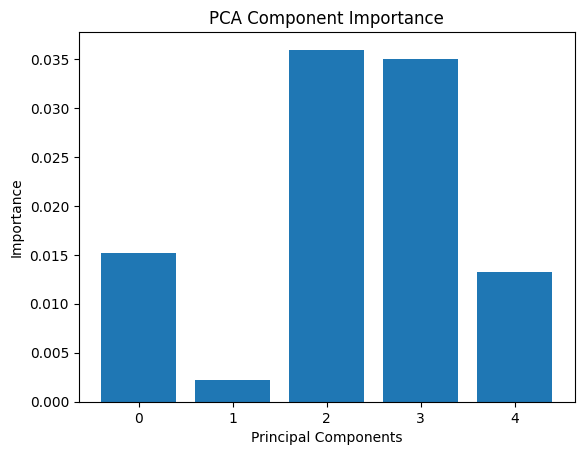

In [241]:
importance = abs(model_pca.coef_[0])
plt.bar(range(len(importance)), importance)
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.title('PCA Component Importance')
plt.show()


For Random Forest:

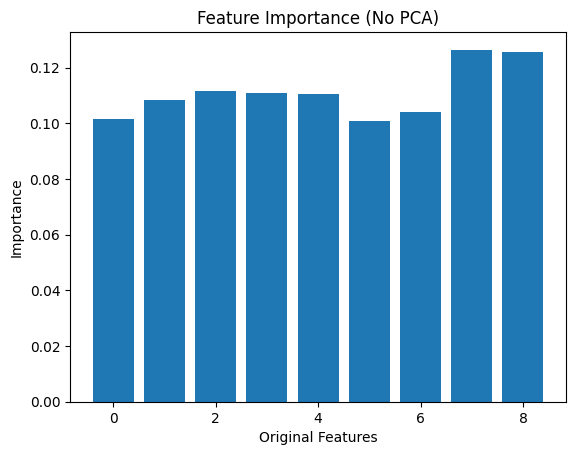

In [242]:
plt.bar(range(len(model_raw.feature_importances_)), model_raw.feature_importances_)
plt.xlabel('Original Features')
plt.ylabel('Importance')
plt.title('Feature Importance (No PCA)')
plt.show()
